# importing Liberies

In [89]:
from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# load Data

In [90]:
df = pd.read_csv("/home/ellah/Desktop/penguin.csv/Penguin.csv",sep=",")
df.columns 

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Category

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

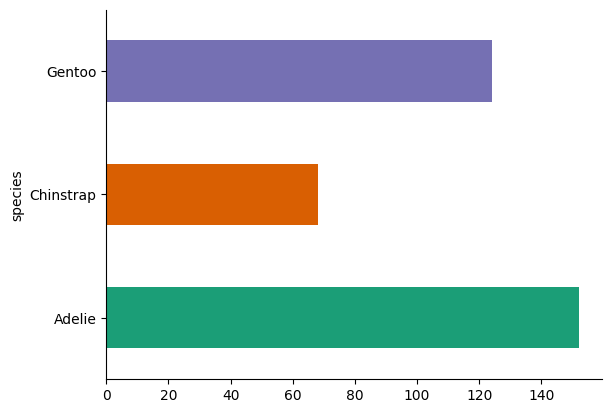

In [91]:
df.groupby('species').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

df.groupby('species').size()

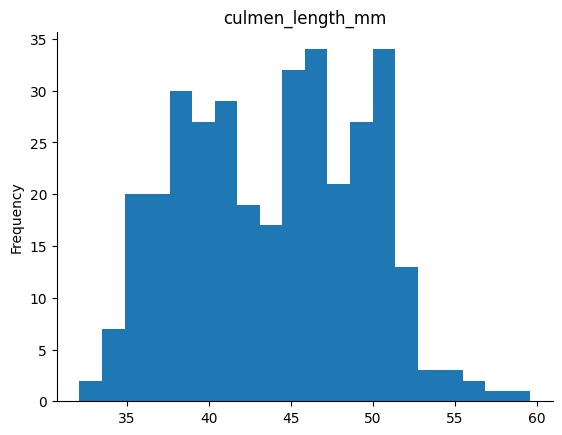

In [92]:
df['culmen_length_mm'].plot(kind='hist', bins=20, title='culmen_length_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Explore Data

In [93]:
print (df.shape)

print (df.head(10))
print (df.tail())
print(df.describe())
print(df.groupby('species').size())

(344, 7)
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   
7  Adelie  Torgersen              39.2             19.6              195.0   
8  Adelie  Torgersen              34.1             18.1              193.0   
9  Adelie  Torgersen              42.0             20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4      

# visualization

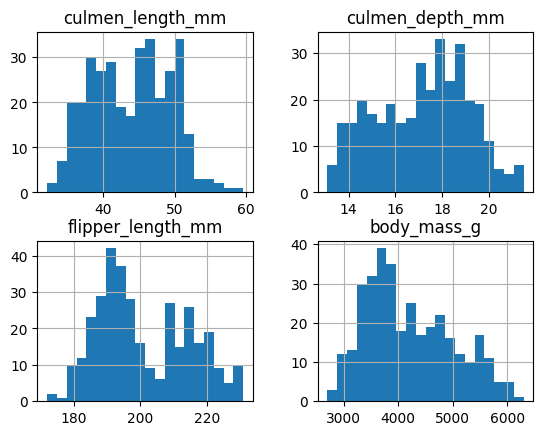

In [94]:
df.hist(bins=20)
plt.show()

# Missing Values

In [95]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

# Predicting the data

In [96]:
array = df.values
X = array[:,0:4]
y = array[:,4]

#print (X)
#print (y)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# model creation and traing

In [97]:
Y_train_str = Y_train.astype(str)


In [98]:
mask = Y_train_str != 'nan'  # filtering out NaNs represented as strings


In [99]:
X_train = X_train[mask]
Y_train = Y_train_str[mask].astype(float).astype(int)


In [100]:
Y_train = Y_train.astype(int)

In [111]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode features and labels
le_features = LabelEncoder()
X_train = np.array([le_features.fit_transform(col) for col in X_train.T]).T  # if X_train is categorical
Y_train = LabelEncoder().fit_transform(Y_train)

# Use fewer folds if some classes are rare
kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

# Train and evaluate
model = svm.SVC(kernel='rbf', gamma='scale')
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

print("CV Accuracy Scores:", cv_results)


CV Accuracy Scores: [0.14285714 0.12087912 0.08791209]


/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)


In [129]:
X_full = df.drop('culmen_length_mm', axis=1)  # replace with your target column name
Y_full = df['culmen_length_mm']

In [130]:
print(X_full.dtypes)
print(Y_full.head())

species               object
island                object
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
0    39.1
1    39.5
2    40.3
3     NaN
4    36.7
Name: culmen_length_mm, dtype: float64


In [131]:
X_full_encoded = pd.get_dummies(X_full)  # encodes all categorical features automatically


In [132]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_full_encoded = label_encoder.fit_transform(Y_full)

In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)


In [120]:
import pandas as pd
import numpy as np

# Step 1: Convert Y_validation to Series to use .isin()
Y_validation_series = pd.Series(Y_validation)

# Step 2: Create boolean mask for common labels
common_labels = set(Y_train) & set(Y_validation_series)
mask = Y_validation_series.isin(common_labels)

# Step 3: Use mask.to_numpy() to avoid index mismatch errors
X_validation_filtered = X_validation[mask.to_numpy()]
Y_validation_filtered = Y_validation_series[mask].to_numpy()

In [116]:
print(type(X_validation))  # DataFrame or ndarray?
print(type(Y_validation))  # Should be Series or ndarray
print(mask.index)          # Index of your boolean mask
print(X_validation.shape)  # Rows to make sure it matches


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=69, step=1)
(69, 4)


In [119]:
import pandas as pd
import numpy as np

# Convert Y_validation (NumPy array) to a Pandas Series
Y_validation_series = pd.Series(Y_validation)

# Get common labels between training and validation labels
common_labels = set(Y_train) & set(Y_validation_series)

# Create a mask for rows with labels in both training and validation
mask = Y_validation_series.isin(common_labels)

# Apply mask to both X_validation and Y_validation
X_validation_filtered = X_validation[mask.to_numpy()]  # use mask as NumPy array
Y_validation_filtered = Y_validation_series[mask].to_numpy()


In [134]:
from sklearn.svm import SVC

# Initialize and train the model
model = SVC(gamma='auto')
model.fit(X_train, Y_train)  # Make sure X_train and Y_train are aligned and preprocessed


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [136]:
Y_validation = Y_validation.astype(int)

print (Y_validation)
print (predictions)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[218 222 221 183 223 225 199 180 190 215 201 216 229 197 208 188 193 215
 192 194 210 194 229 221 205 181 193 181 213 202 199 199 213 185 190 187
 193 184 226 185 189 195 202 209 216 210 197 228 201 191 193 210 176 187
 209 191 221 197 194 182 225 187 230 213 190 180 181 206 186]


NameError: name 'predictions' is not defined

# Exploring SVM Model

In [103]:
models = []
models.append(('SVM', SVC(gamma='auto')))
print (models)


results = []
names = []



for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('=======================')
	print(name)
	print(cv_results)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

[('SVM', SVC(gamma='auto'))]
SVM
[0.07142857 0.07142857 0.03571429 0.03703704 0.07407407 0.07407407
 0.03703704 0.03703704 0.         0.07407407]
SVM: 0.051190 (0.024189)


/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/ellah/ros2_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater t